In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from arch import arch_model
import warnings


matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)
%matplotlib inline

c:\users\yunlin\miniconda3\envs\py3k\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel('DR.xlsx', index_col=0, parse_dates=[0]).fillna(0.0)
df.columns = ['ICBC', 'HSBC', 'Lloyds', 'BNP', 'DB', 'RBS']
df.head()

,ICBC,HSBC,Lloyds,BNP,DB,RBS
Date,,,,,,
2008-08-05,0.000000,-0.030238,-0.015830,-0.048955,-0.013225,-9.014434
2008-08-06,-0.003472,0.013269,0.023018,0.006108,0.000646,0.456810
2008-08-07,0.005235,0.012334,-0.096302,0.004193,-0.010222,-1.319985
2008-08-08,0.003504,-0.007394,-0.023228,-0.013104,-0.018728,-1.343147
2008-08-11,0.028828,-0.002298,-0.014116,0.038186,0.004328,-0.251297


In [3]:
def computeVaRHistorical(rets, p=5):
    return -np.percentile(rets, p)

def computeVaRNormal(rets, p=5):
    zscore = stats.norm.ppf(p/100)
    mean = np.mean(rets)
    std = np.std(rets)
    return - (mean + zscore * std)

def computeVaRMC(rets, p=5):
    zscore = stats.norm.ppf(5/100)
    mdl = arch_model(rets, p=1, q=1)
    res = mdl.fit(disp='off', show_warning=False)
    fc = res.forecast()
    mean = fc.mean.dropna().iloc[0,0]
    std = np.sqrt(fc.variance.dropna().iloc[0,0])
    return - (mean + zscore * std)

In [4]:
df.aggregate(computeVaRHistorical)

ICBC      0.028968
HSBC      0.025847
Lloyds    0.042298
BNP       0.037219
DB        0.039550
RBS       6.671283
dtype: float64

In [5]:
df.aggregate(computeVaRNormal)

ICBC       0.032126
HSBC       0.031635
Lloyds     0.062074
BNP        0.044198
DB         0.046358
RBS       24.268569
dtype: float64

Text(0.5,1,'Daily VaR excluding RBS using Historical Simulation')

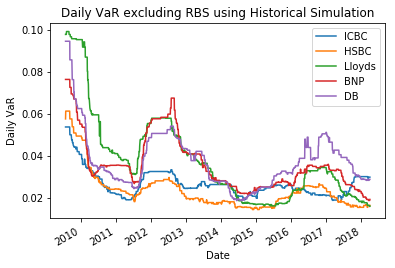

In [6]:
hist_var = df.rolling(250).apply(computeVaRHistorical).dropna()
hist_var.iloc[:,:-1].plot()
plt.ylabel('Daily VaR')
plt.title('Daily VaR excluding RBS using Historical Simulation')

Text(0.5,1,'Daily VaR for RBS using Normal Estimate')

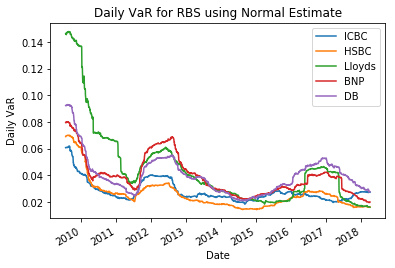

In [7]:
norm_var = df.rolling(250).apply(computeVaRNormal).dropna()
norm_var.iloc[:,:-1].plot()
plt.ylabel('Daily VaR')
plt.title('Daily VaR for RBS using Normal Estimate')

Text(0.5,1,'Daily VaR excluding RBS using Monte Carlo Simulation')

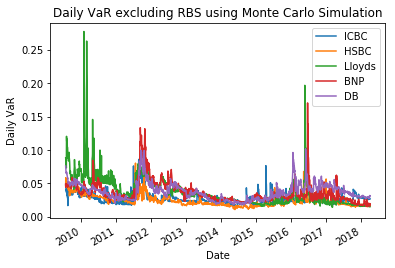

In [8]:
mc_var = df.rolling(250).apply(computeVaRMC).dropna()
mc_var.iloc[:,:-1].plot()
plt.ylabel('Daily VaR')
plt.title('Daily VaR excluding RBS using Monte Carlo Simulation')

In [9]:
mc_var.to_csv('mc_var.csv')
norm_var.to_csv('norm_var.csv')
hist_var.to_csv('hist_var.csv')

In [10]:
def run_backtest(bank, )

SyntaxError: invalid syntax (<ipython-input-10-2f33b94618c7>, line 1)